In [1]:
!pip install -r requirements.txt

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering

In [19]:
# --- Environment Setup ---
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['JOBLIB_LOKY_BACKEND'] = 'threading'
plt.style.use('ggplot')
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K = 5


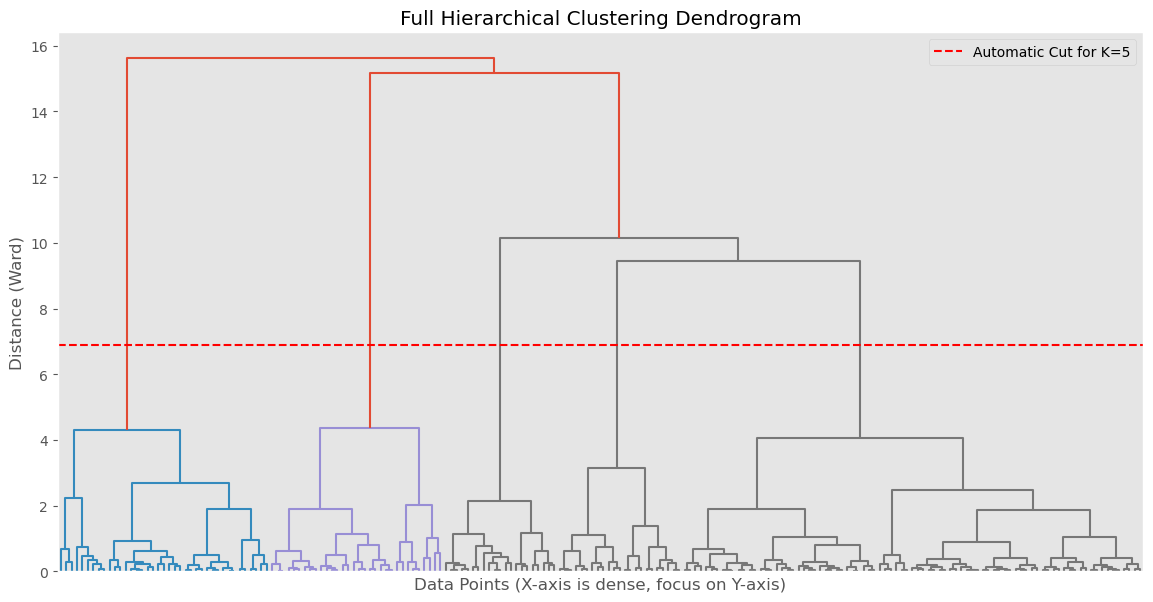

In [29]:
# --- Plot 1: Dendrogram ---
plt.figure(figsize=(14, 7))
plt.title("Full Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points (X-axis is dense, focus on Y-axis)")
plt.ylabel("Distance (Ward)")

# Calculate linkage
Z = hierarchy.linkage(X_scaled, method='ward')

# Find the largest gap between cluster merge distances
distances = Z[:, 2] # Get all merge distances
gaps = np.diff(distances) # Calculate the jump between merges
idx_largest_gap = np.argmax(gaps) # Find the index of the biggest jump

# K = (Total merges) - (Index of largest gap)
# N_merges = N_points - 1 = 199
k = (X_scaled.shape[0] - 1) - idx_largest_gap
print(f"K = {k}")

# Calculate the height for the cut line 
cut_height = (distances[idx_largest_gap] + distances[idx_largest_gap + 1]) / 2

hierarchy.dendrogram(Z, no_labels=True) 

plt.axhline(y=cut_height, c='red', linestyle='--', label=f'Automatic Cut for K={k}')
plt.legend()
plt.grid(axis='y')


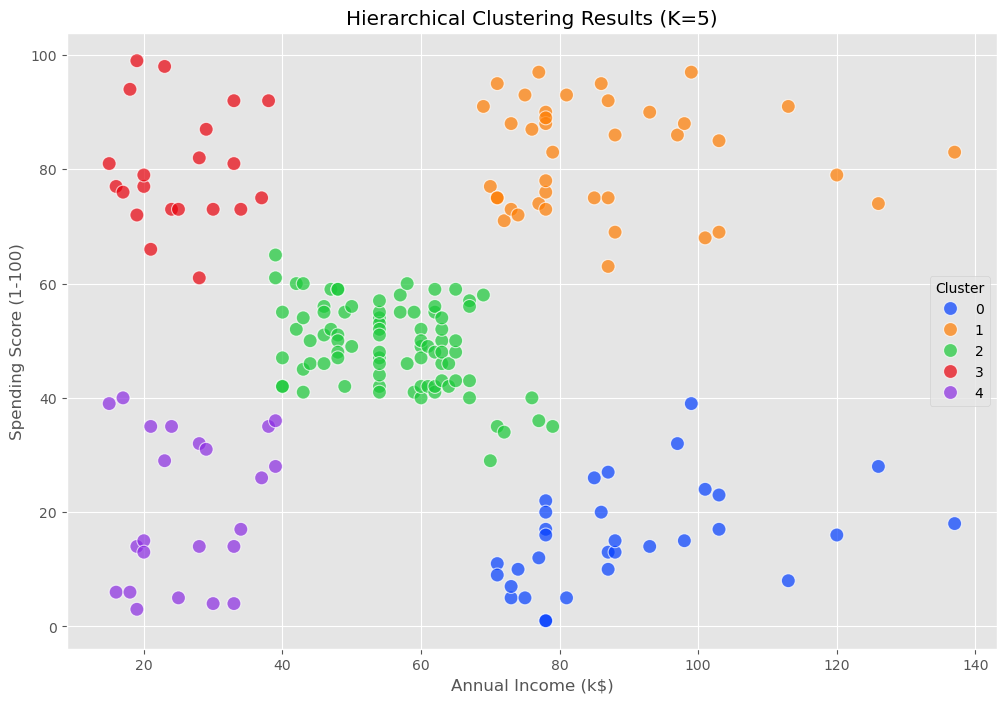

In [31]:
# --- Plot 2: Scatter Plot---

hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

df['HC_Cluster'] = y_hc

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='HC_Cluster',
    palette=sns.color_palette('bright', n_colors=k_auto),
    s=100,
    alpha=0.7,
    legend='full'
)
plt.title(f'Hierarchical Clustering Results (K={k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)